# Trabajo Práctico 2 ALC

In [129]:
# Librerias e imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.linalg import norm
from numpy.linalg import matrix_power
from funciones import metodoPotencia, calcularLU, inversaLU

---

## 1)

Sea $S_n = (I+A+A^2+...+A^n)$ 
$$
(I-A)^{-1} = \lim_{n\to\infty} S_n \Rightarrow I = (I-A) \lim_{n\to\infty} S_n = \lim_{n\to\infty} (I-A) S_n
$$
$$
\Rightarrow I = lim_{n\to\infty} I - A^{n+1} = I - lim_{n\to\infty} A^{n+1} \Rightarrow lim_{n\to\infty} A^{n+1} = 0
$$
Cálculo Auxiliar:
$$
(I-A)(I+A+A^2+...+A^n) = I - \cancel{A} + \cancel{A} - \cancel{A^2} + \cancel{A^2} + ... - \cancel{A^n} + \cancel{A^n} - A^{n+1} = I-A^{n+1}
$$

---

## Consigna 2 - Vectores de Norma

Para este punto, nos vamos a dedicar a procesar la norma de las matrices $A_1$ y $A_2$ dadas para armar los vectores correspondientes hasta un largo de $N=250$.

In [130]:
# Declaración matrices
A1 = np.array([
    [.186, .521, .014, .32, .134],
    [.24, .073, .219, .013, .327],
    [.098, .12, .311, .302, .208],
    [.173, .03, .133, .14, .074],
    [.303, .256, .323, .225, .257]
])

A2 = np.array([
    [.186, .521, .014, .32, .134],
    [.24, .073, .219, .013, .327],
    [.098, .12, .311, .302, .208],
    [.173, .03, .133, .14, .074],
    [.003, .256, .323, .225, .257]
])

Se observa que la única diferencia entre $A_1$ y $A_2$ es la posición $(A_i)_{5, 1}$ para $i=1,2$. El objetivo va a ser poder exponer de manera adecuada como esta diferencia, en el orden de las décimas, afecta a la norma 2 de ambas. 

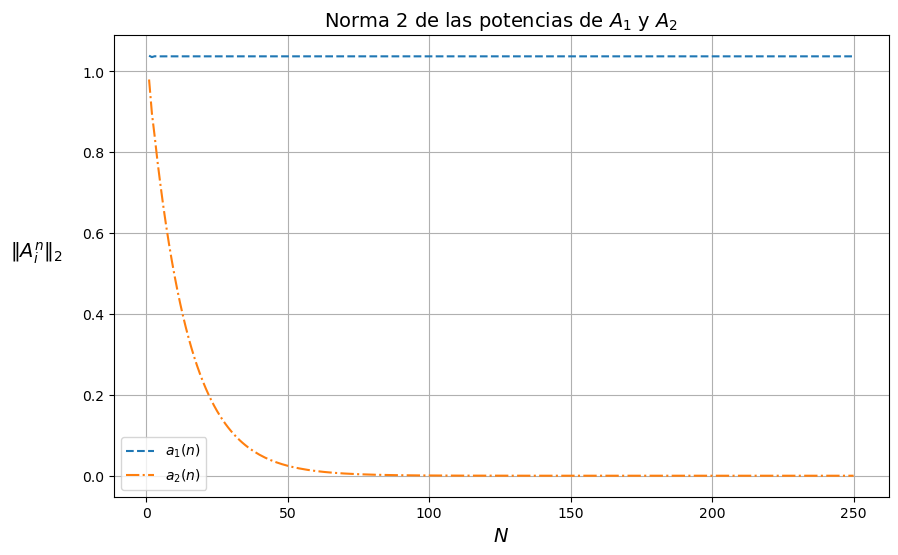

In [131]:
# Generamos vectores que registren la norma
a1 = [0] * 250
a2 = [0] * 250
N = [i for i in range(1, 250 + 1)]
for i in N:
    a1[i - 1] = norm(matrix_power(A1, i), 2)
    a2[i - 1] = norm(matrix_power(A2, i), 2)

# Ahora los ploteamos como una recta 
plt.figure(figsize=(10, 6))
plt.title(r"Norma 2 de las potencias de $A_1$ y $A_2$", fontsize=14)
ax = plt.gca()
plt.plot(N, a1, "--", label=r"$a_1(n)$")
plt.plot(N, a2, "-.", label=r"$a_2(n)$")
plt.xlabel(r"$N$", fontsize=14)
plt.ylabel(r"$\|A_i^n\|_2$", fontsize=14, rotation="horizontal")
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.grid()
plt.legend()
plt.show()

Vemos que para $A_1$, la norma 2 de las potencias se mantiene estable, mientras que para $A_2$ tiende a 0. Como la norma 2 depende del radio espectral, y este de los autovalores de la matriz, podemos intuir que para $A_2$ su autovalor principal es menor que 1, así $A_2^{n}$ tiende a 0 cuando n crece, mientras que para $A_1$ su autovalor principal debe ser 1 o muy cercano a el.

---

## Consigna 3 - Calculo de autovalor y autovector por Método de la Potencia

Calcularemos ahora dichos autovalores principales a través del método de la potencia.

In [132]:
# Armo array de autovectores para cada matriz
a1_k = np.array([metodoPotencia(A1)[1] for _ in range(250)])
a2_k = np.array([metodoPotencia(A2)[1] for _ in range(250)])

In [133]:
# Calculo la distribución de autovalores a partir del coeficiente de Rayleigh
lambda1_k = np.array(
    [(v.T @ A1 @ v)/(v.T @ v) for v in a1_k]
    )
lambda2_k = np.array(
    [(v.T @ A2 @ v)/(v.T @ v) for v in a2_k]
    )

# Simplemente calculamos el promedio y el desvio estándar
lambda1, lambda1_std = lambda1_k.mean(), lambda1_k.std()
lambda2, lambda2_std = lambda2_k.mean(), lambda2_k.std()

print(f'Media Autovalor 1: {lambda1:.30f}/ Desviación estandar: {lambda1_std:.30f}')
print(f'Media Autovalor 2: {lambda2:.30f}/ Desviación estandar: {lambda2_std:.30f}')

del lambda1, lambda1_k, lambda1_std, a1_k
del lambda2, lambda2_k, lambda2_std, a2_k

Media Autovalor 1: 1.000000002067066739996903379506/ Desviación estandar: 0.000000009539420857579812869503
Media Autovalor 2: 0.927651451705936769265292696218/ Desviación estandar: 0.000000040855861932826913425626


Vemos que primer autovalor es 1 y el segundo autovalor es menor que 1, tal como intuímos, además el desvío estándar es muy bajo ya que el método de la potencia está usando 250 repeticiones y estamos generalizando con una muestra de 250 aplicaciones para Monte Carlo.

---

## Consigna 4 - Análisis de Serie de Potencias

Empezamos haciendo el gráfico de la serie de potencias de $(I - A)^{-1}$ de ambas matrices con $n=10$ y $n=100$. El gráfico va a constar de ver la norma 2 de la matriz para cada $n$, es decir, cada punto muestra como es la norma dos de la matriz conformada por la serie hasta cierto $n$.

In [134]:
# Calculo las potencias
serie_M1 = np.array([matrix_power(A1, i) for i in range(1, 100 + 1)])
serie_M2 = np.array([matrix_power(A2, i) for i in range(1, 100 + 1)])

# Calculo cada instancia de la suma
serie_M1_sum = [np.eye(A1.shape[0])]
serie_M2_sum = [np.eye(A2.shape[0])]
for i in range(1, 100 + 1):
    serie_M1_sum.append(serie_M1_sum[i-1] + serie_M1[i-1])
    serie_M2_sum.append(serie_M2_sum[i-1] + serie_M2[i-1])

# Ahora si, pasamos a la norma 2
serie_M1_norm = np.array([norm(mat, 2) for mat in serie_M1_sum])
serie_M2_norm = np.array([norm(mat, 2) for mat in serie_M2_sum])

serie_M1_sum = np.array(serie_M1_sum)
serie_M2_sum = np.array(serie_M2_sum)

Ya tenemos la norma 2 de las matrices que genera la serie, podemos ilustrar la comparativa de la serie para los diferentes $n$ propuestos y también diferenciar el comportamiento de ambas matrices.

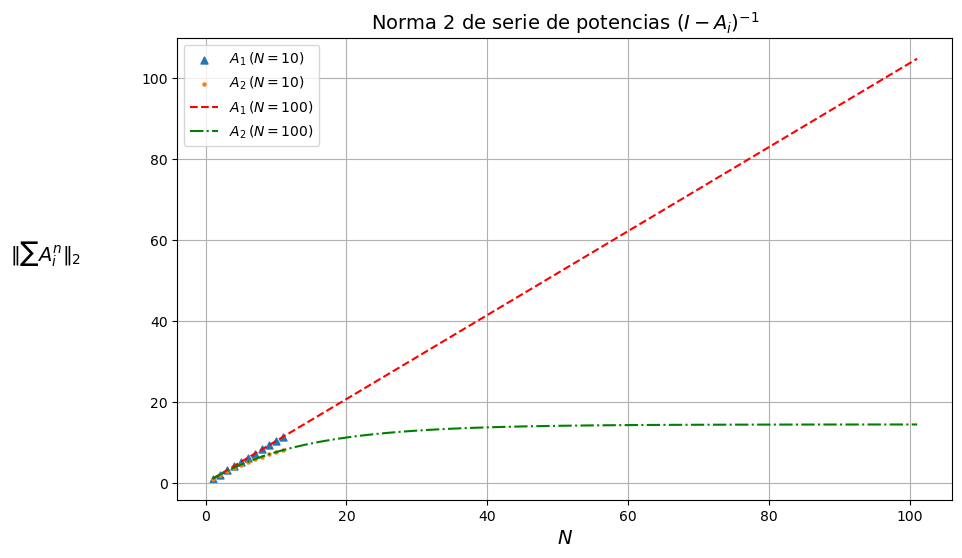

In [135]:
# Realizamos un scatter plot
N = [i for i in range(1, 100 + 2)]
plt.figure(figsize=(10, 6))
plt.title(r"Norma 2 de serie de potencias $(I-A_i)^{-1}$", fontsize=14)
ax = plt.gca()
plt.scatter(N[:11], serie_M1_norm[:11], label=r"$A_1\,(N=10)$", marker="^", s=25)
plt.scatter(N[:11], serie_M2_norm[:11], label=r"$A_2\,(N=10)$", marker=".", s=20)
plt.plot(N, serie_M1_norm, "--", label=r"$A_1\,(N=100)$", color="red")
plt.plot(N, serie_M2_norm, "-.", label=r"$A_2\,(N=100)$", color="green")
plt.xlabel(r"$N$", fontsize=14)
plt.ylabel(r"$\|\sum A_i^n\|_2$", fontsize=14, rotation="horizontal")
ax.yaxis.set_label_coords(-0.17, 0.5)
plt.grid()
plt.legend()
plt.show()

La serie de potencias de $A_1$ muestra un crecimiento lineal en la norma a medida que N aumenta, esto se debe a que su autovalor principal es 1 y vimos anteriormente que la norma 2 de sus potencias se mantiene constante, por lo que $\sum_{n=1}^{\infty} A_1^n$ no converge.  
Mientras que la serie de potencias de $A_2$ tiende a estabilizarse en un valor constante de la norma a medida que N crece, ya que como vimos antes la norma 2 de $A_2^n$ tiende a 0 cuando n aumenta, por lo que podemos concluir que $\sum_{n=1}^{\infty} A_2^n$ converge.

Con los visto hasta ahora, podríamos establecer que, en general, la serie infinita $I+A+A^2+...+A^n$ converge si y solo si el autovalor con el mayor valor absoluto es menor que 1.

Ahora procedemos a graficar el error obtenido entre la serie y la matriz $(I-A)^{-1}$ mediante la norma 2 de la diferencia. Vamos a construir dos vectores error $e_1$ y $e_2$ que serían:

$$e_i = \|(I+A_i+A_i^2+\dots+A_i^n)-(I-A_i)^{-1}\|_2$$

In [136]:
# Obtengo la matriz
M1 = (np.eye(A1.shape[0])-A1)
params1 = calcularLU(M1)
invM1 = inversaLU(*params1)
M2 = (np.eye(A2.shape[0])-A2)
params2 = calcularLU(M2)
invM2 = inversaLU(*params2)

# Calculamos el vector de error
diff1 = serie_M1_sum - invM1
diff2 = serie_M2_sum - invM2
e1, e2= [], []
for i in range(len(diff1)):
    e1.append(norm(diff1[i], 2))
    e2.append(norm(diff2[i], 2))
e1 = np.array(e1)
e2 = np.array(e2)

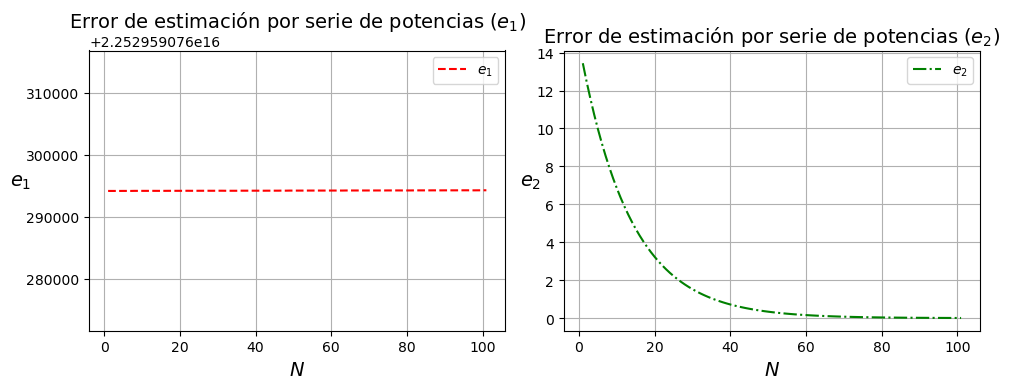

In [137]:
N = [i for i in range(1, 100 + 2)]

# Fig con supblots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# e1
axs[0].plot(N, e1, "--", label=r"$e_1$", color="red")
axs[0].set_title(r"Error de estimación por serie de potencias ($e_1$)", fontsize=14)
axs[0].set_xlabel(r"$N$", fontsize=14)
axs[0].set_ylabel(r"$e_1$", fontsize=14, rotation="horizontal")
axs[0].grid()
axs[0].legend()

# e2
axs[1].plot(N, e2, "-.", label=r"$e_2$", color="green")
axs[1].set_title(r"Error de estimación por serie de potencias ($e_2$)", fontsize=14)
axs[1].set_xlabel(r"$N$", fontsize=14)
axs[1].set_ylabel(r"$e_2$", fontsize=14, rotation="horizontal")
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

del axs, diff1, diff2, e1, e2, i, invM1, invM2, M1, M2, N
del params1, params2, serie_M1, serie_M2, serie_M1_sum, serie_M2_sum
del serie_M1_norm, serie_M2_norm


Para $A_2$ el hecho de que el error $e_2(n) = \left\| \left( I + A_2 + A_2^2 + \dots + A_2^n \right) - (I - A_2)^{-1} \right\|_2$ decrezca de manera exponencial indica que la serie de potencias de $A_2$ converge correctamente a $(I - A_2)^{-1}$. Esto tiene sentido porque, como vimos antes, el autovalor dominante de $A_2$ es menor que 1, lo cual asegura la convergencia de la serie infinita. Debido a esto, el valor de $(I - A_2)^{-1}$ calculado a través de la serie es exacto o extremadamente cercano a la verdadera inversa, resultando en un error prácticamente nulo.  
En el caso de $A_1$, el error $e_1(n)$ se mantiene constante, lo cual indica que la serie de potencias de $A_1$ no converge a $(I - A_1)^{-1}$. El error no parece decrecer al iterar.


---

## Consigna 5 - Aplicación a matrices de economía

Empezamos usando la data de los países para generar las matrices $A^{rr}$ y $A^{ss}$. Al grupo le tocaron Nicaragua y Guatemala, por ende, las matrices que vamos a analizar son las matrices de economía interna de Nicaragua y Guatemala. 


In [138]:
# Cargo la data que esta en formato csv
df = pd.read_csv(r"data_paises.csv")

# Selecciono GTM y NIC, Guatemala y Nicaragua
df_gtm = df[df["Country_iso3"] == "GTM"]
df_nic = df[df["Country_iso3"] == "NIC"]

# Consigo los P 
P_gtm = df_nic["Output"]
P_nic = df_nic["Output"]

# Cambio los 0s a 1s para poder conseguir las A
P_nic = np.array(P_nic.replace({0:1}))
P_gtm = np.array(P_gtm.replace({0:1}))

# Creo cuatro df que representan las matrices Z
df_gtm_gtm = df_gtm[[col for col in df_gtm.columns if (col.startswith("GTM"))]]
df_gtm_nic = df_gtm[[col for col in df_gtm.columns if (col.startswith("NIC"))]]
df_nic_gtm = df_nic[[col for col in df_nic.columns if (col.startswith("GTM"))]]
df_nic_nic = df_nic[[col for col in df_nic.columns if (col.startswith("NIC"))]]

# Mando a matriz de coef. técnicos
A_nic_nic = np.array(df_nic_nic) / P_nic
A_nic_gtm = np.array(df_nic_gtm) / P_gtm
A_gtm_nic = np.array(df_gtm_nic) / P_nic
A_gtm_gtm = np.array(df_gtm_gtm) / P_gtm


Para poder determinar si va a haber convergencia por parte de una serie de potencias, como vimos en la Consigna 4, solo necesitamos ver que el mayor autovalor de cada matriz es menor estricto que 1. A continuación, vamos a declarar que $A_1$ es la matriz correspondiente de Nicaragua y $A_2$ es para con Guatemala. El renombre es para reciclar celdas anteriores y aclaramos que el calculo de autovector y autovalor de mayor magnitud esta contenido en la función del método de la potencia. 

In [139]:
# Renombre de las matrices de economias internas
A1 = A_nic_nic
A2 = A_gtm_gtm

# Calculo de autovalores por metodo de la potencia
autov1, _ = metodoPotencia(A1)
autov2, _ = metodoPotencia(A2)

# Imprimo los valores
print("Autovalor Nicaragua: ", autov1)
print("Autovalor Guatemala: ", autov2)

Autovalor Nicaragua:  0.2606962595495193
Autovalor Guatemala:  2.1361280974050407


Vemos que para Guatemala su autovalor principal es mayor que 1, por lo que no va a existir convergencia de la suma de potencias, mientras que para Nicaragua la serie sí va a converger.

## Consigna 6 - Análisis en Componentes Principales

### a)
$$
E_n = I_n - \frac{1}{n} \cdot e_n \cdot e_n^t = I_n - 
\begin{pmatrix}
\frac{1}{n} & \frac{1}{n} & \cdots & \frac{1}{n} \\
\frac{1}{n} & \frac{1}{n} & \cdots & \frac{1}{n}\\
\vdots & \vdots & \ddots & \vdots \\
\frac{1}{n} & \frac{1}{n} & \cdots & \frac{1}{n}
\end{pmatrix}
=
\begin{pmatrix}
1 - \frac{1}{n} & -\frac{1}{n} & \cdots & - \frac{1}{n} \\
- \frac{1}{n} & 1 - \frac{1}{n} & \cdots & - \frac{1}{n}\\
\vdots & \vdots & \ddots & \vdots \\
-\frac{1}{n} & - \frac{1}{n} & \cdots & 1 - \frac{1}{n}
\end{pmatrix}
\\
\Rightarrow
\begin{pmatrix}
1 - \frac{1}{n} & -\frac{1}{n} & \cdots & - \frac{1}{n} \\
- \frac{1}{n} & 1 - \frac{1}{n} & \cdots & - \frac{1}{n}\\
\vdots & \vdots & \ddots & \vdots \\
-\frac{1}{n} & - \frac{1}{n} & \cdots & 1 - \frac{1}{n}
\end{pmatrix}
\cdot
\begin{pmatrix}
z_1 \\
z_2 \\
\vdots \\
z_n
\end{pmatrix}
=
\begin{pmatrix}
\boxed{z_1 - \frac{z_1}{n}} + -\frac{z_2}{n} + \cdots + - \frac{z_n}{n} \\
\boxed{- \frac{z_1}{n}} + z_2 - \frac{z_2}{n} + \cdots + - \frac{z_n}{n}\\
\vdots \\
\boxed{-\frac{z_1}{n}} + - \frac{z_2}{n} + \cdots + z_n - \frac{z_n}{n}
\end{pmatrix}
\\
= z_i - \sum_{i=1}^n \frac{z_i}{n} = 0 \ \forall i \in [1,n]
$$

Observando las partes encuadradas, se puede ver que en cada fila podemos descomponer el resultado en distintas columnas que, al sumar las partes de dicha columna, dan 0. De esta manera, el promedio de las componentes va a ser 0.

### b)
Por la sugerencia, me fijo si los vectores de la base $ \left\{ e, d_2, \dots, d_n \right\}$ son autovectores:

Observación: 
$e \cdot e^t \cdot e = 
\begin{pmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1
\end{pmatrix}
\cdot 
\begin{pmatrix}
1 \\
1 \\
\vdots \\
1
\end{pmatrix}= 
\begin{pmatrix}
n \\
n \\
\vdots \\
n
\end{pmatrix}
\Rightarrow
\frac{1}{n} \cdot e \cdot e^t \cdot e = e
$
$$
E_n \cdot e = \lambda \cdot e 
\Leftrightarrow (I_n - \frac{1}{n} \cdot e \cdot e^t) \cdot e = \lambda \cdot e
\Leftrightarrow e - \frac{1}{n} \cdot e \cdot e^t \cdot e = \lambda \cdot e
\Leftrightarrow e - \lambda \cdot e = \frac{1}{n} \cdot e \cdot e^t \cdot e
\Leftrightarrow e - \lambda \cdot e = e
\Leftrightarrow - \lambda \cdot e = 0
\Leftrightarrow \lambda = 0
$$

Entonces $e$ es autovector de autovalor $\lambda = 0$. Ahora tomamos un vector $d$ tal que $<d,e> = 0$.

$$
E_n \cdot d = \lambda \cdot d
\Leftrightarrow  (I_n - \frac{1}{n} \cdot e \cdot e^t) \cdot d = \lambda \cdot d
\Leftrightarrow d - \frac{1}{n} \cdot e \cdot e^t \cdot d = \lambda \cdot d
\Leftrightarrow d = \lambda \cdot d
\Leftrightarrow \lambda = 1
$$

Vemos que si $d \perp e$, entonces d es autovector de autovalor $\lambda = 1$. Es de suma importancia notar que el subespacio $<e>$ tiene dimensión 1 y el subespacio $<e>^\perp$ tiene dimensión $n-1$, ergo, {$e, d_2, d_3, \cdots, d_n$} tiene dimensión $n$ y es una base de autovectores. Todos los autovectores $d_i \ \forall i \in$ {$1, \cdots, n-1$} tienen  autovalor 1 y $e$ tiene autovalor 0. A partir de esto último, vemos que {$d_2, d_3, \cdots, d_n$} $= Im(E_n)$ y {$e$} $= Ker(E_n)$ por el teorema de la dimensión.

### c)
$E_n$ es una matriz de proyección ortogonal $\Leftrightarrow$ $E_n=E_n^t=E_n^2$

$$
\mathbf{E_n=E_n^t}
$$

$$
E_n^t = (I_n - \frac{1}{n} \cdot e \cdot e^t)^t = I_n^t - \frac{1}{n} \cdot (e^t)^t \cdot e^t = I_n - \frac{1}{n} \cdot e \cdot e^t = E_n
$$


$$
\mathbf{E_n=E_n^2}
$$

Observación: $e^t \cdot e = n$

$$
E_n \cdot E_n = (I_n - \frac{1}{n} \cdot e \cdot e^t) \cdot (I_n - \frac{1}{n} \cdot e \cdot e^t) = I_n - \frac{2}{n} \cdot e \cdot e^t + \frac{1}{n^2} \cdot e \cdot e^t \cdot e \cdot e^t
= I_n - \frac{2}{n} \cdot e \cdot e^t + \frac{1}{n^{\cancel{2}}} \cdot e \cdot \cancel{n} \cdot e^t = I_n - \frac{2}{n} \cdot e \cdot e^t + \frac{1}{n} \cdot e \cdot e^t = I_n - \frac{1}{n} \cdot e \cdot e^t = E_n
$$

Por lo tanto, $E_n$ es una matriz de proyección ortogonal.

Por el punto b), sabemos que la imágen de $E_n$ es <$d2, ..., dn$> $\Rightarrow$ {$d_2, \cdots, d_n$} es base de $<e>^t \Rightarrow E_n$ proyecta sobre $<e>^t$  

### d)
#### I) $E_n$ es una matriz ortogonal
$E_n$ es una matriz ortogonal $\Leftrightarrow E_n \cdot E_n = I_n$.
Por punto c) $E_n \cdot E_n = E_n^2 = E_n \ne I_n \Rightarrow Falso$
#### II) $E_n$ es singular
Por punto b) sabemos que $E_n$ tiene autovalor $\lambda = 0 \Rightarrow det(E_n) = 0 \Rightarrow E_n \space singular \Rightarrow Verdadero$
#### III) $E_n$ es definida positiva
Como $E_n$ tiene autovalor $\lambda = 0 \Rightarrow$ no todos sus autovalores son positivos $\Rightarrow E_n$ no es difinida positiva $\Rightarrow Falso$
#### IV) Traza($E_n$) $= n - 1$
Sea $a_{ij}$ los elemtentos de $E_n$, traza($E_n$) $= a_{11} + a_{22} + \cdots + a_{kk} ,k = 1, 2, \cdots, n= \sum_{k=1}^n 1 - \frac{1}{k}= n - \frac{n}{n} = n - 1 \Rightarrow Verdadero$

## Consigna 7 - Análisis en Componentes Principales por el método de la potencia

En esta sección nos ocupamos de hacer una análisis de componentes principales a partir del método de la potencia y deflación de Hotelling. Primero se centran los datos utilizando la matriz $E_n$ para luego aplicar el método de la potencia para conseguir autovectores y autovalores. 

In [140]:
# Definimos una funcion para obtener E_n
def matriz_E_n(n):
    # Crear la matriz identidad I_n
    I_n = np.eye(n)
    
    # Crear el vector columna e
    e = np.ones((n, 1))

    # Calcular E_n
    E_n = I_n - (1/n) * (e @ e.T)
    
    return E_n

In [141]:
# Normalizamos la matriz de coeficientes para la economía interna de Nicaragua
n = 40
E_40 = matriz_E_n(n)
A1_norm = E_40 @ A1

# Calculamos la matriz de covarianza
C1 = (A1_norm.T @ A1_norm) / (n-1)

In [142]:
# Primer autovector y autovalor
lambda_1, v1 = metodoPotencia(C1)

# Deflación de Hotelling
C1_deflacionada = C1 - lambda_1 * (v1 @ v1.T)

# Segundo autovector y autovalor en la matriz deflacionada
lambda_2, v2 = metodoPotencia(C1_deflacionada)

print("Autovalor 1: {}, Autovalor 2: {}".format(lambda_1, lambda_2))

Autovalor 1: 0.017967824763543416, Autovalor 2: 0.004234854358075655


## Consigna 8 - Proyección de Rubros

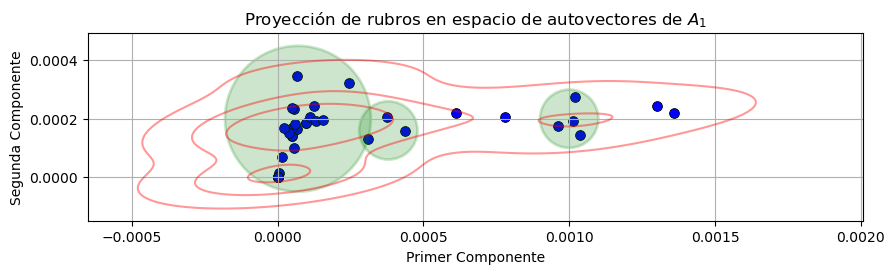

In [143]:
# Proyecto la matriz A1
A1_proy = np.column_stack((v1*lambda_1, v2*lambda_2)).T @ A1 # Proyección en 2D
x = A1_proy[0, :]
y = A1_proy[1, :]

# Graficamos el scatter plot en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x, y=y, color='blue', edgecolor='k', s=50)
sns.kdeplot(x=x, y=y, levels=4, color='red', alpha=0.4) 
plt.xlabel('Primer Componente')
plt.ylabel('Segunda Componente')
plt.grid()
plt.title('Proyección de rubros en espacio de autovectores de $A_1$')
plt.gca().set_aspect('equal', adjustable='box')

# Anotaciones
centros_clusters = [(0.00007, 0.00020), (0.00038, 0.00016), (0.0010, 0.0002)]
radios_clusters = [0.00025, 0.00010, 0.00010]

for center, radius in zip(centros_clusters, radios_clusters):
    circle = plt.Circle(center, radius, color='green', alpha=0.2, linewidth=2)
    plt.gca().add_patch(circle)

plt.show()

Podemos ver que en los círculos verdes hay tres clusters más o menos clasificables dependiendo de que tan severos queramos ser con el factor de distancia. Además, se aprecian ciertos puntos que parecen estar al rededor de estos clusters principales teniendo de base el gráfico de densidad. Por otro lado, el sector del cluster más poblado parece tener una proyección bastante definida, casi que parecen obedecer una recta lineal hasta cierto punto.

## Consigna 9 - Matriz input-output integrada verticalmente

Sea $\mathbf{H}$ la matriz definida como:

$$
\mathbf{H} = \mathbf{A} (\mathbf{I} - \mathbf{A})^{-1}
$$

donde $\mathbf{A}$ es la matriz input-output que representa las interdependencias en el sistema, e $\mathbf{I}$ es la matriz identidad. 

Esta definición de $\mathbf{H}$ se puede relacionar con la suma de potencias de $\mathbf{A}$ expandiendo el término $(\mathbf{I} - \mathbf{A})^{-1}$ como una serie geométrica (siempre y cuando el radio espectral de $\mathbf{A}$ sea menor que 1), tenemos:

$$
(\mathbf{I} - \mathbf{A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \dots
$$

Por lo tanto, podemos escribir:

$$
\mathbf{H} = \mathbf{A} (\mathbf{I} + \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \dots) = \mathbf{A} + \mathbf{A}^2 + \mathbf{A}^3 + \mathbf
{A}^4 + \dots
$$

Vemos que $\mathbf{H}$ es, en efecto, la suma infinita de las potencias de $\mathbf{A}$, pero sin el término identidad inicial, es decir,

$$
\mathbf{H} = \sum_{k=1}^{\infty} \mathbf{A}^{k}
$$

Esto implica que $\mathbf{H}$ representa una matriz que refuerza las conexiones fuertes en $\mathbf{A}$, ya que incorpora interacciones directas ($\mathbf{A}$), interacciones de segundo orden ($\mathbf{A}^2$), y así sucesivamente. En cada potencia adicional de $\mathbf{A}$, se consideran efectos indirectos cada vez más lejanos, pero que aún influyen en el sistema. Esta acumulación de términos potencia amplifica los sectores que tienen mayores relaciones entre sí en $\mathbf{A}$, dándoles mayor peso en $\mathbf{A}$.


## Consigna 10 - ACP de la matriz H

In [144]:
# Primero aproximamos la inversa de (I - A) a partir de la serie geométrica
ImenosA_inv = np.eye(40)
potencia_A = np.eye(40)
    
for _ in range(1, 100):
    potencia_A = potencia_A @ A1
    ImenosA_inv += potencia_A

# Calculamos H
H = A1 @ ImenosA_inv

In [145]:
# Normalizamos H
H_norm = E_40 @ H

# Calculamos la matriz de covarianza
C = (H_norm.T @ H_norm) / (40-1)

In [146]:
# Primer autovector y autovalor
lambda_1, v1 = metodoPotencia(C)

# Deflación de Hotelling
C_deflacionada = C - lambda_1 * (v1 @ v1.T)

# Segundo autovector y autovalor en la matriz deflacionada
lambda_2, v2 = metodoPotencia(C_deflacionada)

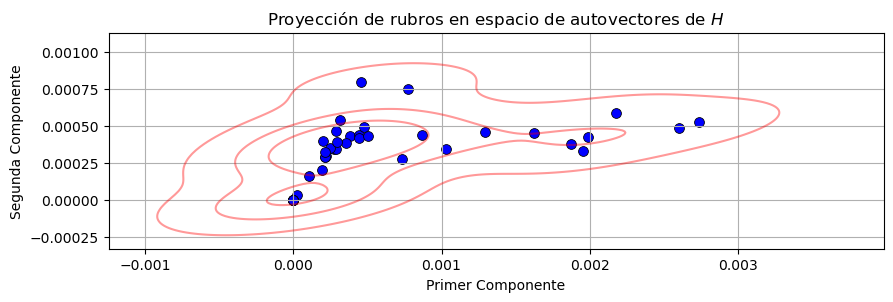

In [147]:
# Proyecto la matriz H
H_proy = np.column_stack((v1*lambda_1, v2*lambda_2)).T @ H # Proyección en 2D
x = H_proy[0, :]
y = H_proy[1, :]

# Graficamos el scatter plot en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x, y=y, color='blue', edgecolor='k', s=50)
sns.kdeplot(x=x, y=y, levels=4, color='red', alpha=0.4) 
plt.xlabel('Primer Componente')
plt.ylabel('Segunda Componente')
plt.grid()
plt.title('Proyección de rubros en espacio de autovectores de $H$')
plt.gca().set_aspect('equal', adjustable='box')

# Anotaciones
#centros_clusters = [(0.00007, 0.00020), (0.00038, 0.00016), (0.0010, 0.0002)]
#radios_clusters = [0.00025, 0.00010, 0.00010]

#for center, radius in zip(centros_clusters, radios_clusters):
    #circle = plt.Circle(center, radius, color='green', alpha=0.2, linewidth=2)
    #plt.gca().add_patch(circle)

plt.show()

## Consigna 11 - Análisis de perfil de producción para sectores diferenciados

In [148]:
distancias = np.sqrt(x**2 + y**2)

# Encontrar el índice del punto más lejano
indice_mas_lejano = np.argmax(distancias)
distancia_maxima = distancias[indice_mas_lejano]

# Encontrar el índice del punto más cercano (excluyendo ceros)
distancias_no_cero = np.where(distancias != 0, distancias, np.inf)
indice_mas_cercano = np.argmin(distancias_no_cero)
distancia_minima = distancias[indice_mas_cercano]

print(f"Sector más lejano:")
print(f"- Índice del sector: {indice_mas_lejano}")
print(f"- Distancia: {distancia_maxima:.6e}")

print(f"\nSector más cercano (excluyendo ceros):")
print(f"- Índice del sector: {indice_mas_cercano}")
print(f"- Distancia: {distancia_minima:.6e}")

# Número de puntos que están en el origen (distancia = 0)
puntos_en_origen = np.sum(distancias == 0)
print(f"\nPuntos en el origen: {puntos_en_origen}")

Sector más lejano:
- Índice del sector: 7
- Distancia: 2.785155e-03

Sector más cercano (excluyendo ceros):
- Índice del sector: 15
- Distancia: 4.032893e-05

Puntos en el origen: 7


#### Gráfico para H:

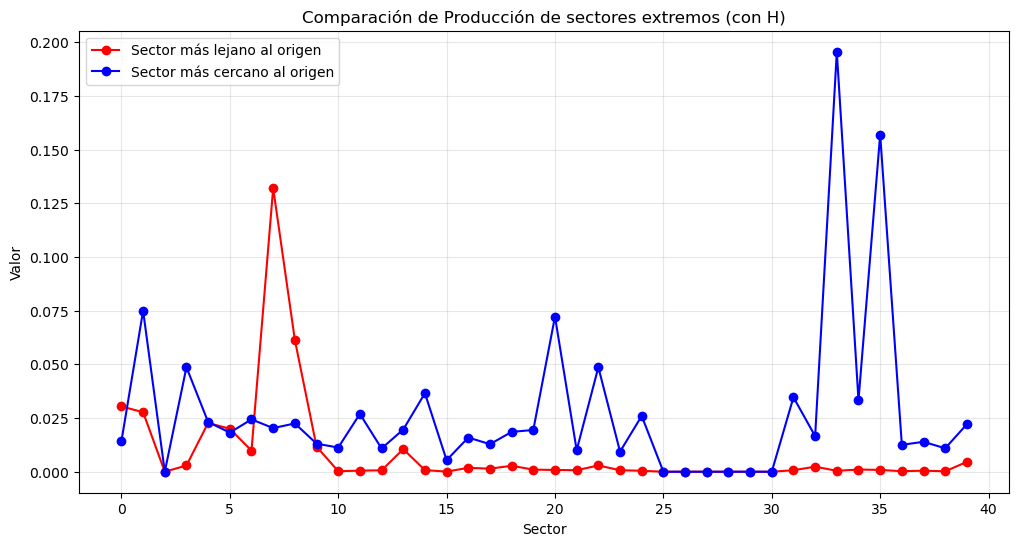

In [149]:
plt.figure(figsize=(12, 6))

# Graficar la fila más lejana
plt.plot(H[indice_mas_lejano], marker='o', label='Sector más lejano al origen', color='red')

# Graficar la fila más cercana
plt.plot(H[indice_mas_cercano], marker='o', label='Sector más cercano al origen', color='blue')

plt.title('Comparación de Producción de sectores extremos (con H)')
plt.xlabel('Sector')
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

#### Gráfico para $A1$

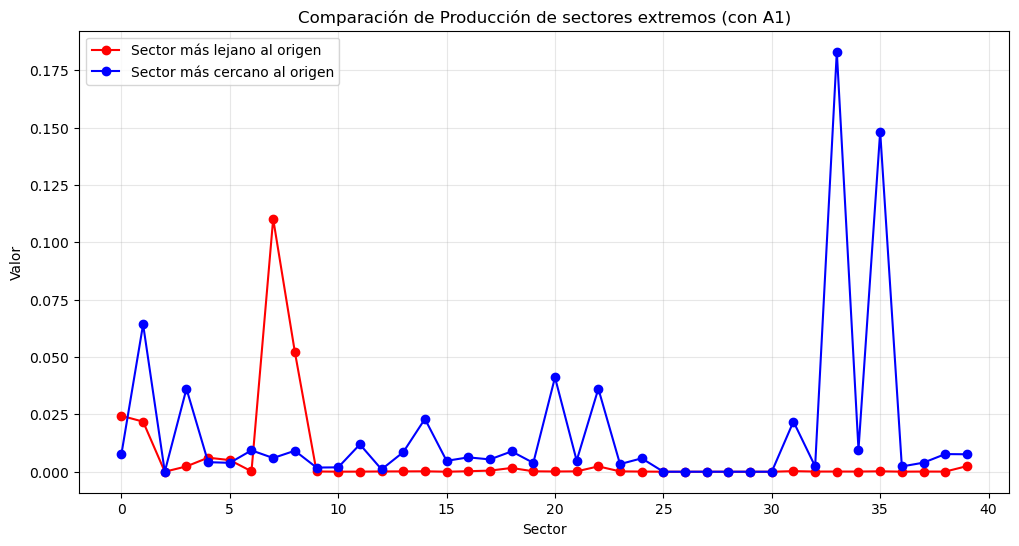

In [150]:
plt.figure(figsize=(12, 6))

# Graficar la fila más lejana
plt.plot(A1[indice_mas_lejano], marker='o', label='Sector más lejano al origen', color='red')

# Graficar la fila más cercana
plt.plot(A1[indice_mas_cercano], marker='o', label='Sector más cercano al origen', color='blue')

plt.title('Comparación de Producción de sectores extremos (con A1)')
plt.xlabel('Sector')
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Vemos que a simple vista los gráficos son similares, sin embargo, para el caso de $\mathbf{H}$ las diferencias entre los sectores son más pronunciadas.  
Recordando que $H = A(I - A)^{-1}$ actúa como un amplificador de las relaciones entre sectores que ya tienen alta influencia en la matriz $\mathbf{ A}$, es lógico que las diferencias sean más pronunciadas en el gráfico de $\mathbf{H}$

Para el gráfico de $\mathbf{H}$, la diferencia entre el sector más cercano y el más alejado del origen refleja la intensidad de sus interacciones con otros sectores. El sector más alejado tiene muchas conexiones fuertes, lo que hace que su curva en $\mathbf{H}$ sea más pronunciada, ya que $\mathbf{H}$ enfatiza estas relaciones. El sector más cercano, en cambio, tiene menos conexiones y su curva es más suave, mostrando un menor impacto en la economía integrada.  

Para el gráfico de $\mathbf{A1}$, que refleja solo las interacciones directas, la diferencia entre ambos sectores también se observa, pero de forma menos pronunciada. Aquí, el sector más alejado sigue mostrando una curva algo más marcada debido a sus conexiones directas, pero la intensidad de estas relaciones es menor que en $\mathbf{H}$.  

Debido a esto, el grafico de $\mathbf{H}$ muestra unas diferencias más pronunciadas que en el gráfico de $\mathbf{A1}$.